# EDA & Modelling

## Package loading

In [1]:
from EZS_deps.EZS_func import *
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn import set_config
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from pandas.api.types import is_numeric_dtype
from itertools import product
from joblib import dump
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer


## Exploratory Data Analysis 

### File and parameters loading

In [80]:
problem_type = 'classification'

In [81]:
stacking = 'True'

In [82]:
data_size = 'large'

In [83]:
df = pd.read_csv('/home/phbillet/Documents/python project/EZStacking-main/dataset/mushrooms.csv')

In [84]:
target_col = 'Class'

#### Thresholds

In [85]:
threshold_NaN = 0.5

In [86]:
threshold_cat = 5

In [87]:
threshold_Z = 3.0

In [88]:
test_size = 0.33

In [89]:
threshold_entropy = 0.75

In [90]:
threshold_corr = 0.95

In [91]:
threshold_model = 5

In [92]:
threshold_score = 0.7

In [93]:
threshold_feature = 5

#### Drop user's columns:

In [94]:
user_drop_cols = ['bruises', 'cap_color', 'cap_shape', 'cap_surface', 'gill_attachment', 'gill_color', 'gill_spacing', 'habitat', 'population', 'ring_number', 'ring_type', 'stalk_color_above_ring', 'stalk_color_below_ring', 'stalk_shape', 'stalk_surface_below_ring', 'veil_color', 'veil_type']


Dataset before deletion

In [95]:
display(df)

Class cap_shape cap_surface cap_color bruises odor gill_attachment  \
0        p         x           s         n       t    p               f   
1        e         x           s         y       t    a               f   
2        e         b           s         w       t    l               f   
3        p         x           y         w       t    p               f   
4        e         x           s         g       f    n               f   
...    ...       ...         ...       ...     ...  ...             ...   
8119     e         k           s         n       f    n               a   
8120     e         x           s         n       f    n               a   
8121     e         f           s         n       f    n               a   
8122     p         k           y         n       f    y               f   
8123     e         x           s         n       f    n               a   

     gill_spacing gill_size gill_color  ... stalk_surface_below_ring  \
0               c         n          k  ...                        s   
1               c         b          k  ...                        s   
2               c         b          n  ...                        s   
3               c         n          n  ...                        s   
4               w         b          k  ...                        s   
...           ...       ...        ...  ...                      ...   
8119            c         b          y  ...                        s   
8120            c         b          y  ...                        s   
8121            c         b          n  ...                        s   
8122            c         n          b  ...                        k   
8123            c         b          y  ...                        s   

     stalk_color_above_ring stalk_color_below_ring veil_type veil_color  \
0                         w                      w         p          w   
1                         w                      w         p          w   
2                         w                      w         p          w   
3                         w                      w         p          w   
4                         w                      w         p          w   
...                     ...                    ...       ...        ...   
8119                      o                      o         p          o   
8120                      o                      o         p          n   
8121                      o                      o         p          o   
8122                      w                      w         p          w   
8123                      o                      o         p          o   

     ring_number ring_type spore_print_color population habitat  
0              o         p                 k          s       u  
1              o         p                 n          n       g  
2              o         p                 n          n       m  
3              o         p                 k          s       u  
4              o         e                 n          a       g  
...          ...       ...               ...        ...     ...  
8119           o         p                 b          c       l  
8120           o         p                 b          v       l  
8121           o         p                 b          c       l  
8122           o         e                 w          v       l  
8123           o         p                 o          c       l  

[8124 rows x 23 columns]

In [96]:
df = df.drop(user_drop_cols, axis=1)

Dataset after deletion

In [97]:
display(df)

Class odor gill_size stalk_root stalk_surface_above_ring  \
0        p    p         n          e                        s   
1        e    a         b          c                        s   
2        e    l         b          c                        s   
3        p    p         n          e                        s   
4        e    n         b          e                        s   
...    ...  ...       ...        ...                      ...   
8119     e    n         b          ?                        s   
8120     e    n         b          ?                        s   
8121     e    n         b          ?                        s   
8122     p    y         n          ?                        s   
8123     e    n         b          ?                        s   

     spore_print_color  
0                    k  
1                    n  
2                    n  
3                    k  
4                    n  
...                ...  
8119                 b  
8120                 b  
8121                 b  
8122                 w  
8123                 o  

[8124 rows x 6 columns]

#### Dataset copy

In [98]:
df_copy = df.copy()

### Dataset Information

In [99]:
df.shape

(8124, 6)

#### Some records

In [100]:
display(df)

Class odor gill_size stalk_root stalk_surface_above_ring  \
0        p    p         n          e                        s   
1        e    a         b          c                        s   
2        e    l         b          c                        s   
3        p    p         n          e                        s   
4        e    n         b          e                        s   
...    ...  ...       ...        ...                      ...   
8119     e    n         b          ?                        s   
8120     e    n         b          ?                        s   
8121     e    n         b          ?                        s   
8122     p    y         n          ?                        s   
8123     e    n         b          ?                        s   

     spore_print_color  
0                    k  
1                    n  
2                    n  
3                    k  
4                    n  
...                ...  
8119                 b  
8120                 b  
8121                 b  
8122                 w  
8123                 o  

[8124 rows x 6 columns]

#### Dataframe structure

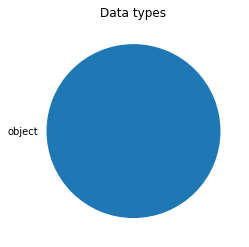

In [101]:
plot_dataframe_structure(df)

#### Dataframe statistics

In [102]:
display(df.describe().T)

count unique top  freq
Class                     8124      2   e  4208
odor                      8124      9   n  3528
gill_size                 8124      2   b  5612
stalk_root                8124      5   b  3776
stalk_surface_above_ring  8124      4   s  5176
spore_print_color         8124      9   w  2388

#### Which columns could be categorical ?

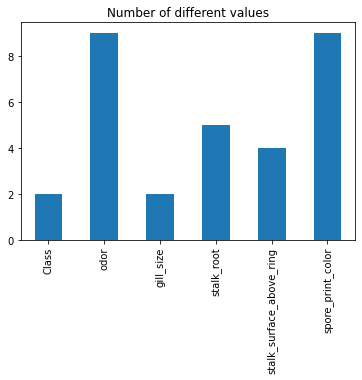

In [103]:
plot_categorical(df)

### Dataset Cleaning

#### Duplicate rows:

In [104]:
duplicates(df)

Number of rows before removing: 8124
Number of duplicate rows: 8075
Number of rows after removing: 49


Class odor gill_size stalk_root stalk_surface_above_ring  \
0        p    p         n          e                        s   
1        e    a         b          c                        s   
2        e    l         b          c                        s   
4        e    n         b          e                        s   
5        e    a         b          c                        s   
13       p    p         n          e                        s   
14       e    n         b          e                        s   
15       e    n         n          e                        s   
24       e    l         b          c                        s   
28       e    n         n          e                        s   
29       e    a         n          b                        s   
33       e    l         b          r                        s   
35       e    l         n          b                        s   
41       e    l         b          r                        s   
50       e    a         b          r                        s   
67       e    a         b          r                        s   
76       e    l         n          b                        s   
80       e    n         b          e                        f   
100      e    n         b          e                        f   
112      e    a         n          b                        s   
305      e    n         b          b                        s   
335      e    n         b          b                        s   
1816     p    f         b          b                        k   
2210     p    c         n          b                        s   
2285     p    c         n          b                        s   
3959     p    f         b          b                        f   
3984     e    n         b          ?                        s   
3996     p    f         b          b                        s   
4023     p    y         n          ?                        k   
4076     e    n         n          ?                        s   
4104     p    f         n          ?                        s   
4106     p    n         b          b                        s   
4165     e    n         n          b                        f   
4200     p    y         n          ?                        s   
4329     p    s         n          ?                        k   
4331     p    n         n          ?                        k   
4364     p    n         n          b                        s   
4461     p    s         n          ?                        s   
4491     e    n         n          b                        s   
4722     p    f         n          ?                        k   
6038     e    n         b          ?                        s   
6068     e    n         b          ?                        k   
6120     e    n         b          b                        s   
6375     e    n         b          ?                        s   
6415     p    m         b          c                        k   
6424     e    n         b          ?                        s   
6558     e    n         b          ?                        s   
6912     p    n         n          c                        y   
6967     e    n         b          b                        y   

     spore_print_color  
0                    k  
1                    n  
2                    n  
4                    n  
5                    k  
13                   n  
14                   k  
15                   n  
24                   k  
28                   k  
29                   n  
33                   n  
35                   n  
41                   k  
50                   k  
67                   n  
76                   u  
80                   n  
100                  k  
112                  u  
305                  n  
335                  k  
1816                 h  
2210                 n  
2285                 k  
3959                 h  
3984                 w  
3996                 h  
4023                 w  
4076

#### Drop NaN:

In [105]:
df, drop_cols = drop_na(df, threshold_NaN)

No need to drop columns.


Set of dropped columns: NaN

In [106]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [107]:
display(dropped_cols)

array(['bruises', 'cap_color', 'cap_shape', 'cap_surface',
       'gill_attachment', 'gill_color', 'gill_spacing', 'habitat',
       'population', 'ring_number', 'ring_type', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'stalk_shape',
       'stalk_surface_below_ring', 'veil_color', 'veil_type'],
      dtype='<U32')

#### Encoding data:

In [108]:
df, encoded_cols = encoding(df, threshold_cat, target_col)

Encoding object column: Class
Encoding object column: odor
Encoding object column: gill_size
Encoding object column: stalk_root
Encoding object column: stalk_surface_above_ring
Encoding object column: spore_print_color


#### Imputing NaN using IterativeImputer

##### Imputation

In [109]:
df = imputation(df)

No need to impute data.


#### Data compression:

In [110]:
df = downcast_dtypes(df)

Memory usage of dataframe is 0.37MB
Memory usage after optimization is: 0.05MB
Decreased by 87.5%


##### Dataframe structure after compression

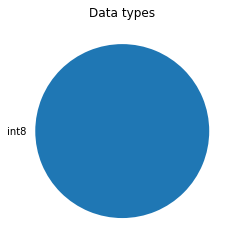

In [111]:
plot_dataframe_structure(df)

#### Outliers:

In [112]:
df = outliers(df, threshold_Z)

Using Z_score,  48  rows will be suppressed.


#### Correlation

In [113]:
corr = df.corr() 
corr.style.background_gradient(cmap='coolwarm')

In [114]:
correlated_features = correlated_columns(df, threshold_corr, target_col) 
dropped_cols = np.unique(np.concatenate((drop_cols, correlated_features)))

#### Check columns that should be dropped

In [115]:
print(dropped_cols)

[]


## Splittings 

In [116]:
df = df_copy

#### Splitting dataframe in features and targets

In [117]:
y = df[target_col]

In [118]:
X = df.drop(target_col, axis=1)

##### Dimensions

In [119]:
nb_features = len(X.columns.tolist())

In [120]:
nb_targets = len(y.unique())

In [121]:
layer_size = nb_features + nb_targets + 2

##### Splitting data in train and test sets 

In [122]:
X_train, X_test, y_train, y_test = split(X, y, test_size=test_size, threshold_entropy=threshold_entropy)

##### Encoding

In [123]:
target_encoder = LabelEncoder() 
y_train = pd.Series(target_encoder.fit_transform(y_train)) 
y_test = pd.Series(target_encoder.transform(y_test))

## Modelling

### Model building

#### Pipeline building

##### Select the categorical and numerical columns

In [124]:
cat_selector = make_column_selector(dtype_include=object)

In [125]:
num_selector = make_column_selector(dtype_include=np.number)

##### For models based on tree

In [126]:
cat_tree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))

In [127]:
num_tree_processor = make_pipeline(SimpleImputer(strategy='mean', add_indicator=True))

In [128]:
tree_preprocessor = make_pipeline(make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector)), Decorrelator(threshold_corr))

##### For models not based on tree

In [129]:
cat_ntree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse=False))

In [130]:
num_ntree_processor = make_pipeline(SimpleImputer(strategy='mean', add_indicator=True), StandardScaler())

In [131]:
ntree_preprocessor = make_pipeline(make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector)), Decorrelator(threshold_corr))

##### Level-0 models

In [132]:
level_0 = [ 
          ('RFCG', make_pipeline(ntree_preprocessor, RandomForestClassifier(criterion='gini', n_estimators=50))), 
          ('RFCE', make_pipeline(ntree_preprocessor, RandomForestClassifier(criterion='entropy', n_estimators=50))), 
          ('ABC', make_pipeline(ntree_preprocessor, AdaBoostClassifier())), 
          ('SGDCH', make_pipeline(ntree_preprocessor, SGDClassifier(loss='hinge', penalty='elasticnet'))), 
          ('SGDCLL', make_pipeline(ntree_preprocessor, SGDClassifier(loss='log_loss', penalty='elasticnet'))), 
          ('SGDCMH', make_pipeline(ntree_preprocessor, SGDClassifier(loss='modified_huber', penalty='elasticnet'))), 
          ('LOGRL', make_pipeline(ntree_preprocessor, LogisticRegression(solver='lbfgs', penalty='l2'))), 
          ('LOGRS', make_pipeline(ntree_preprocessor, LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.15))), 
          ('LOGRLCV', make_pipeline(ntree_preprocessor, LogisticRegressionCV(cv=5, solver='lbfgs', penalty='l2'))), 
          ('LOGRSCV', make_pipeline(ntree_preprocessor, LogisticRegressionCV(cv=5, solver='saga', penalty='l2'))), 
          ('SVCL', make_pipeline(ntree_preprocessor, SVC(kernel='linear'))), 
          ('SVCP', make_pipeline(ntree_preprocessor, SVC(kernel='poly'))), 
          ('SVCG', make_pipeline(ntree_preprocessor, SVC(kernel='rbf'))), 
          ('SVCS', make_pipeline(ntree_preprocessor, SVC(kernel='sigmoid'))), 
          ]

##### Level-1 model

In [133]:
level_1 = LogisticRegressionCV(cv=5, solver='saga', penalty='elasticnet', l1_ratios=[0.1, 0.5, 0.9], n_jobs=-1)

##### Stacking for classification

In [134]:
model = StackingClassifier(level_0, final_estimator=level_1, n_jobs=-1)

### Model fitting

In [135]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

/opt/anaconda3/envs/EZStacking/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/EZStacking/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

CPU times: user 37.7 s, sys: 1.89 s, total: 39.6 s
Wall time: 49.4 s


StackingClassifier(estimators=[('RFCG',
                                Pipeline(steps=[('pipeline',
                                                 Pipeline(steps=[('columntransformer',
                                                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                                                   Pipeline(steps=[('simpleimputer',
                                                                                                                    SimpleImputer(add_indicator=True)),
                                                                                                                   ('standardscaler',
                                                                                                                    StandardScaler())]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f448979dd50>),
                                                                                                  ('pipeline-2...
                                                                                                                   ('onehotencoder',
                                                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                                                  sparse=False))]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f448979f0a0>)])),
                                                                 ('decorrelator',
                                                                  Decorrelator(threshold=0.95))])),
                                                ('svc',
                                                 SVC(kernel='sigmoid'))]))],
                   final_estimator=LogisticRegressionCV(cv=5,
                                                        l1_ratios=[0.1, 0.5,
                                                                   0.9],
                                                        n_jobs=-1,
                                                        penalty='elasticnet',
                                                        solver='saga'),
                   n_jobs=-1)

### Model evaluation

#### Model scoring

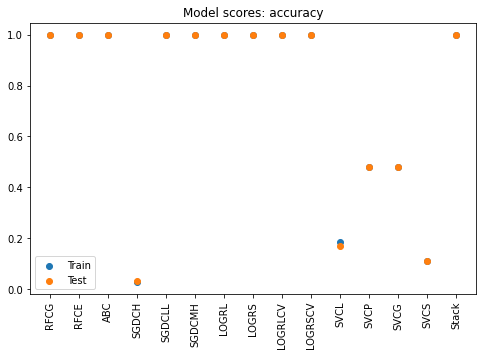

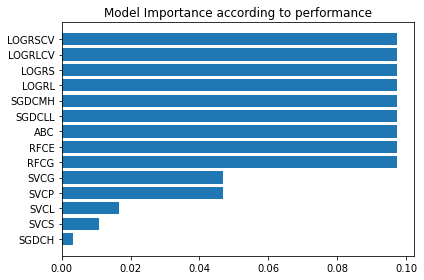

In [136]:
score_stack, mod_imp_score = score_stacking(model, X_train, y_train, X_test, y_test)

#### Model importance

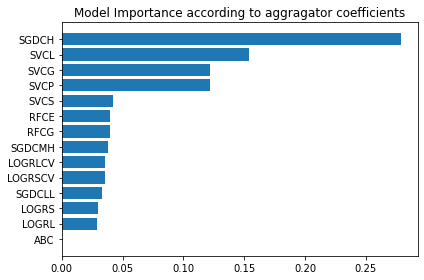

In [137]:
model_imp = plot_model_importance(model)

#### Feature permutation importance (a posteriori)

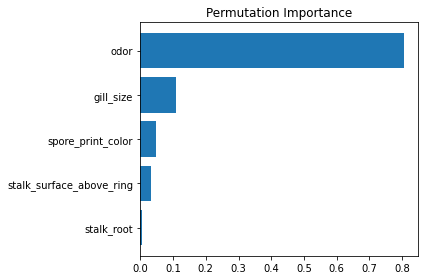

array([['stalk_root', 0.004289679535705295],
       ['stalk_surface_above_ring', 0.033644545378080495],
       ['spore_print_color', 0.04651358398519638],
       ['gill_size', 0.10875599293464551],
       ['odor', 0.8067961981663723]], dtype=object)

In [138]:
plot_perm_importance(model, X_test, y_test)

#### Partial Dependence & Individual Conditional Expectation 

##### Features of interest

In [139]:
features_of_interest = []

In [140]:
plot_partial_dependence(model, X_train, features_of_interest)

'No numeric feature'

#### Classification report

In [141]:
K_classification_report(model, X_train, y_train, X_test, y_test)

#### Confusion matrix

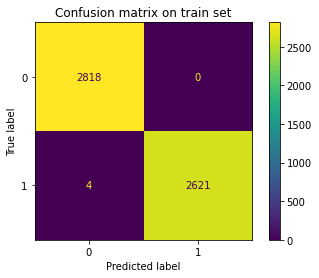

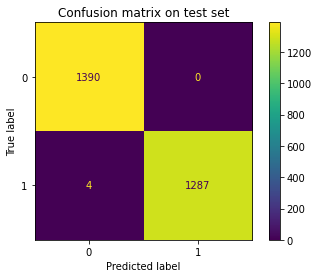

In [142]:
K_confusion_matrix(model, X_train, y_train, X_test, y_test)

### Final Model

In [143]:
threshold_model = 5

In [144]:
threshold_score = 0.7

##### Filtered Level-0 models

In [145]:
level_0_f = model_filtering(level_0, model_imp, threshold_model, score_stack, threshold_score)

##### Final Level-1 model

In [146]:
level_1 = LogisticRegressionCV(cv=5, solver='saga', penalty='elasticnet', l1_ratios=[0.1, 0.5, 0.9], n_jobs=-1)

##### Build final model

In [147]:
model = StackingClassifier(level_0_f, final_estimator=level_1, n_jobs=-1)

### Final Model fitting

In [148]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

/opt/anaconda3/envs/EZStacking/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/EZStacking/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

CPU times: user 13.7 s, sys: 24.5 ms, total: 13.7 s
Wall time: 31.7 s


StackingClassifier(estimators=[('RFCG',
                                Pipeline(steps=[('pipeline',
                                                 Pipeline(steps=[('columntransformer',
                                                                  ColumnTransformer(transformers=[('pipeline-1',
                                                                                                   Pipeline(steps=[('simpleimputer',
                                                                                                                    SimpleImputer(add_indicator=True)),
                                                                                                                   ('standardscaler',
                                                                                                                    StandardScaler())]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f448979dd50>),
                                                                                                  ('pipeline-2...
                                                                                                                    OneHotEncoder(handle_unknown='ignore',
                                                                                                                                  sparse=False))]),
                                                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f448979f0a0>)])),
                                                                 ('decorrelator',
                                                                  Decorrelator(threshold=0.95))])),
                                                ('logisticregressioncv',
                                                 LogisticRegressionCV(cv=5,
                                                                      solver='saga'))]))],
                   final_estimator=LogisticRegressionCV(cv=5,
                                                        l1_ratios=[0.1, 0.5,
                                                                   0.9],
                                                        n_jobs=-1,
                                                        penalty='elasticnet',
                                                        solver='saga'),
                   n_jobs=-1)

#### Final Model scoring

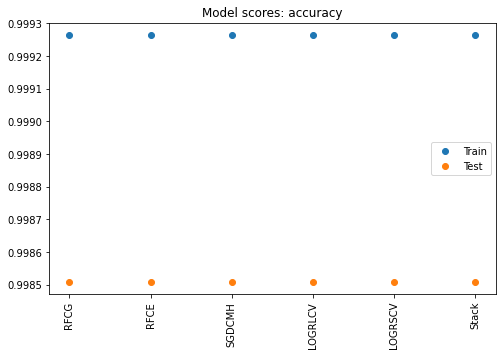

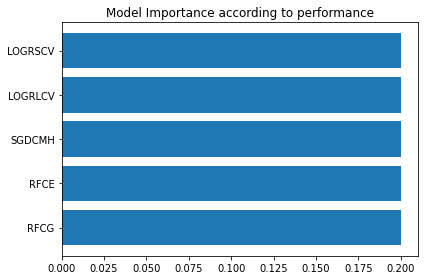

(array([['RFCG', 0.9992651111519383, 0.9985080193957478],
        ['RFCE', 0.9992651111519383, 0.9985080193957478],
        ['SGDCMH', 0.9992651111519383, 0.9985080193957478],
        ['LOGRLCV', 0.9992651111519383, 0.9985080193957478],
        ['LOGRSCV', 0.9992651111519383, 0.9985080193957478],
        ['Stack', 0.9992651111519383, 0.9985080193957478]], dtype=object),
 array([['RFCG', 0.19999999999999998],
        ['RFCE', 0.19999999999999998],
        ['SGDCMH', 0.19999999999999998],
        ['LOGRLCV', 0.19999999999999998],
        ['LOGRSCV', 0.19999999999999998]], dtype=object))

In [149]:
score_stacking(model, X_train, y_train, X_test, y_test)

#### Final feature permutation importance

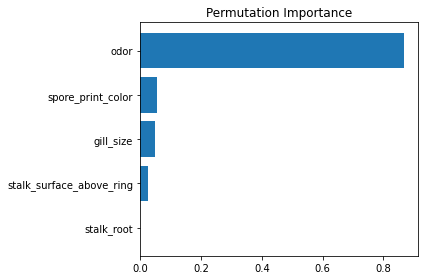

In [150]:
feature_importance = plot_perm_importance(model, X_test, y_test)

##### Final feature elimination

In [151]:
best_feature, worst_feature = feature_filtering(feature_importance, threshold_feature)

In [152]:
dropped_cols = np.unique(np.concatenate((dropped_cols, worst_feature))).tolist()

#### Check those columns, they should be dropped

In [153]:
print(dropped_cols)

[]


#### Final Classification report

In [154]:
K_classification_report(model, X_train, y_train, X_test, y_test)

#### Final Confusion matrix

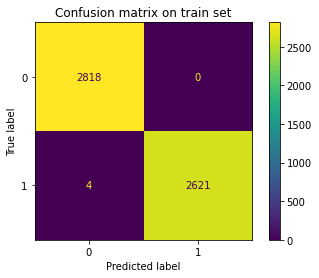

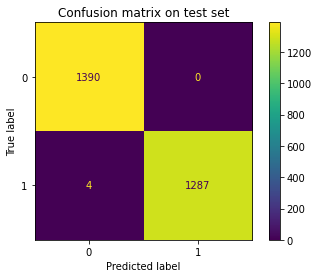

In [155]:
K_confusion_matrix(model, X_train, y_train, X_test, y_test)

## Deployment

### Save your model

In [156]:
model_name = 'model.sav' 
dump(model, model_name)

['model.sav']

### Generate your server

In [157]:
fastapi_server(model, 'model.sav', X, y)

### [Test your API](./server.ipynb)